In [ ]:
install.packages("tidyverse")
install.packages("nycflights13")
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

# STATS 306
## Homework 3:  Advanced `dplyr` and tidy data

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Why so delayed? (4 points)
The following code adds a variable `week` to `flights`, such that `week==1` for the first seven days of the year, `week==2` for days 8-14, etc. (In the second half of the semester we will learn how to work with times and date data using the `lubridate` package.)

In [ ]:
flights_week = mutate(flights, week=lubridate::week(time_hour))

**(a)** Make a bar plot of the proportion of flights each week whose actual departure time is NOT missing. The x-axis of your plot should contain the weeks of the year, ranging from 1 to 52, and the y-axis of your plot should be a number between 0 and 1 showing the decimal proportion of flights that have a departure time. What sort of plot geometry (line, bar, point, histogram, etc.) do you think is appropriate for this kind of plot? Does anything about this plot jump out at you? What and why? *1 point*

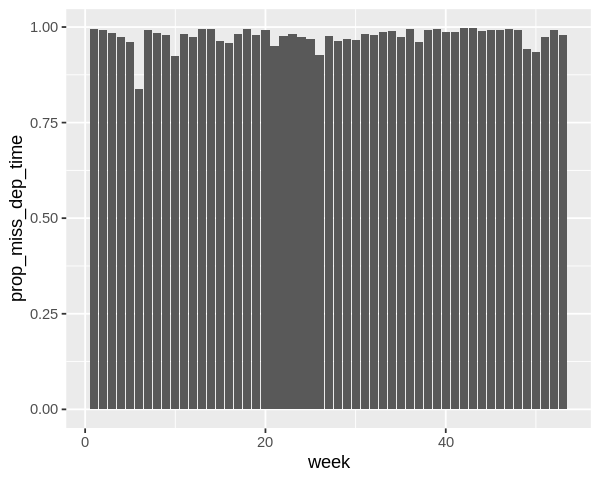

In [ ]:
flights_week %>%
  mutate(delay = ifelse(!is.na(dep_time),1,0)) %>%
  group_by(week) %>%
  mutate(prop_miss_dep_time = mean(delay)) %>% 
  ggplot(aes(x = week, y = prop_miss_dep_time)) +
  geom_bar(stat = "identity", position = "dodge")

# bar graph would be appropriate to see the difference in height to check 
# which week has highest and lowest missing rate

# week 6 jump out to me as it has distinguishable lowest proportion of 
# non-missing rate which meant that week 6 had highest missing proportion

**(b)** For the week with the highest fraction of missing departure times, generate a table which shows the proportion of missing departure times for each day of that week. Your table should have columns `year`, `month`, `day`, and `prop_miss_dep_time`. Sort your table in chronological order and store it in a variable called `table1b`. *1 point*

In [ ]:
table1b <- flights_week %>%
  filter(week == 6) %>%
  mutate(delay = ifelse(!is.na(dep_time),1,0)) %>%
  group_by(year, month, day) %>%
  mutate(prop_miss_dep_time = mean(delay)) %>%
  group_by(year, month, day, prop_miss_dep_time) %>%
  summarise()

table1b

`summarise()` has grouped output by 'year', 'month', 'day'. You can override
using the `.groups` argument.


year,month,day,prop_miss_dep_time
<int>,<int>,<int>,<dbl>
2013,2,5,0.9821429
2013,2,6,0.9911210
2013,2,7,0.9957082
2013,2,8,0.4924731
2013,2,9,0.4254386
2013,2,10,0.9686369
2013,2,11,0.9214209


**(c)** 2 days in `table1b` should jump out at you. What you're discovering from the data is the [North American Blizzard of 2013](https://en.wikipedia.org/wiki/February_2013_North_American_blizzard). Many flights were cancelled due to extreme weather conditions. Identify the proportion of cancelled flights out of LaGuardia Airport (LGA) during the days that jumped out at you for each airline carrier in descending order. *1 point*

In [ ]:
# 2/8 and 2/9
flights_week %>%
  filter(month == 2) %>%
  filter(day == 8 | day == 9) %>%
  filter(origin == 'LGA') %>%
  mutate(delay = ifelse(!is.na(dep_time),1,0)) %>%
  group_by(carrier) %>%
  mutate(prop_miss_dep_time = mean(delay)) %>%
  ungroup() %>%
  group_by(carrier, prop_miss_dep_time) %>%
  summarise() %>%
  arrange(desc(prop_miss_dep_time)) 

`summarise()` has grouped output by 'carrier'. You can override using the
`.groups` argument.


carrier,prop_miss_dep_time
<chr>,<dbl>
AA,0.5694444
WN,0.5555556
B6,0.5000000
EV,0.5000000
F9,0.5000000
FL,0.4761905
US,0.4406780
UA,0.4375000
MQ,0.4000000


**(d)** In your own words, summarize your findings from the previous exercises. Most importantly, comment on which airlines were the most and least cautious in terms of flight cancellations. Can you think of any reason why this might be? *1 point*

In [ ]:
# most of the week had less than 10% flight cancellation, while week 6 had 
# greatest cancellation rate (little above 16%)
# this happened by 2 days that had extreme weather condition, 2/8 and 2/9,
# and YV was least cautious about the cancellation (0% operation) during this 
# time compare to AA which was most cautious (57% operation)

# this might happen due to size of the airline, while AA is big airline that 
# operate many flights for every day, YV only operates a few flights per day

## Problem 2: Graduate school admissions (4 points)
This problem studies a built-in dataset called `UCBAdmissions`. It contains graduate school admissions data from 1973 for six departments at UC Berkeley:

In [ ]:
data(UCBAdmissions)
ucb <- as_tibble(UCBAdmissions) %>% print

(For privacy reasons the names of the departments have been changed to `A`, `B`, ... , `F`.)

**(a)**
Using the tool we learned for summarizing and manipulating tidy data, create a summary table from `ucb` which shows the acceptance rate by gender. Your table should have 5 columns: `Department`, `Gender`, `Admitted`, `Rejected`, and `Proportion Admitted`. Store it in a variable called `table3a`. *1 point*

<table>
<thead><tr><th scope="col">Department</th><th scope="col">Gender</th><th scope="col">Admitted</th><th scope="col">Rejected</th><th scope="col">Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
	<tr><td>A</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
		<tr><td>B</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
			<tr><td>B</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
				<tr><td>C</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
					<tr><td>C</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
						<tr><td>D</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
							<tr><td>D</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
								<tr><td>E</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>E</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Female   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr> 	<tr><td>F</td> <td>Male   </td><td> &dash;     </td><td>&dash;     </td><td>&dash;</td></tr>
</tbody>
</table>

(A few entries have been provided for you; your job is to write code that will produce the complete table with no blanks.)

In [ ]:
table3a <- ucb %>%
  pivot_wider(
  names_from = Admit,
  values_from = n
  ) %>%
    rename(Department = Dept) %>%
    mutate(Proportion_Admitted = Admitted / (Admitted + Rejected)) %>%
    arrange(Department, Gender) %>%
    relocate(c(Department, Gender))
  
  table3a

Department,Gender,Admitted,Rejected,Proportion_Admitted
<chr>,<chr>,<dbl>,<dbl>,<dbl>
A,Female,89,19,0.82407407
A,Male,512,313,0.62060606
B,Female,17,8,0.68000000
B,Male,353,207,0.63035714
C,Female,202,391,0.34064081
C,Male,120,205,0.36923077
D,Female,131,244,0.34933333
D,Male,138,279,0.33093525
E,Female,94,299,0.23918575


**(b)**
In STATS 250 you [learned](https://www.youtube.com/watch?v=6gfMhsWmnwk) how to test for differences in proportions between two populations. Apply this to part (a) `table3a`. Was the overall proportion of men admitted statistically different from that of women? Perform an appropriate test and interpret your findings. What do these result suggest about admissions practices at UC Berkeley in the early 1970s? *1 point*

(Hint: use the `prop.test()` function.)

In [ ]:
# Ho: Pm - Pf = 0
# Ha: Pm - Pf ≠ 0
# if p-value is less than 0.05, it considered as statistically significant (so null rejected)

table3a %>%
  group_by(Gender) %>%
  mutate(admit_total = sum(Admitted)) %>%
  mutate(population = sum(Admitted, Rejected)) %>%
  group_by(Gender, admit_total, population) %>%
  summarise
      
    
prop.test(x = c(1198, 557), n = c(2691, 1835), alternative = "two.sided")

# p-value is less than 0.05, which indicates that overall proportion of men 
# admitted was statistically different from that of women

# it suggest that admission at UC Berkeley in the early 1970s had significant 
# difference in proportion between male and female applicants


`summarise()` has grouped output by 'Gender', 'admit_total'. You can override
using the `.groups` argument.


Gender,admit_total,population
<chr>,<dbl>,<dbl>
Female,557,1835
Male,1198,2691



	2-sample test for equality of proportions with continuity correction

data:  c(1198, 557) out of c(2691, 1835)
X-squared = 91.61, df = 1, p-value < 2.2e-16
alternative hypothesis: two.sided
95 percent confidence interval:
 0.1129887 0.1703022
sample estimates:
   prop 1    prop 2 
0.4451877 0.3035422 


**(c)**
Reproduce the table from Problem 1, but now stratify by department. 
Compute the male and female acceptance proportion for each department separately. *1 point*

Your resulting table should look like:


<table>
<thead><tr><th scope="col">Dept</th><th scope="col">Female_Admitted</th><th scope="col">Female_Rejected</th><th scope="col">Male_Admitted</th><th scope="col">Male_Rejected</th><th scope="col">Male_Proportion_Admitted</th><th scope="col">Female_Proportion_Admitted</th></tr></thead>
<tbody>
	<tr><td>A         </td><td> 89      </td><td> &dash;       </td><td>&dash;       </td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>B         </td><td> &dash;       </td><td>  &dash;       </td><td>353</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>C         </td><td> &dash;       </td><td>  391	     </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>&dash;</td></tr>
	<tr><td>D         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>0.33093525	</td><td>&dash;</td></tr>
	<tr><td>E         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>138       </td><td>&dash;</td><td>&dash;</td></tr>
 	<tr><td>F         </td><td> &dash;       </td><td>  &dash;       </td><td>&dash;</td><td>&dash;       </td><td>&dash;</td><td>0.07038123</td></tr>

</tbody>
</table>

(Again, a few table entries have been provided to help you check your work, and it is your job to provide code that computes the entire table automatically.)

In [ ]:
ucb %>% 
  pivot_wider(
    names_from = c(Gender, Admit), 
    values_from = n) %>%
    mutate(Male_Proportion_Admitted = Male_Admitted / (Male_Admitted + Male_Rejected)) %>%
    mutate(Female_Proportion_Admitted = Female_Admitted / (Female_Admitted + Female_Rejected)) %>%
    relocate(c(Dept, Female_Admitted, Female_Rejected, 
  Male_Admitted, Male_Rejected, Male_Proportion_Admitted, Female_Proportion_Admitted))
   

Dept,Female_Admitted,Female_Rejected,Male_Admitted,Male_Rejected,Male_Proportion_Admitted,Female_Proportion_Admitted
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,89,19,512,313,0.62060606,0.82407407
B,17,8,353,207,0.63035714,0.68000000
C,202,391,120,205,0.36923077,0.34064081
D,131,244,138,279,0.33093525,0.34933333
E,94,299,53,138,0.27748691,0.23918575
F,24,317,22,351,0.05898123,0.07038123


**(d)**
Do the department-level findings in part (c) agree or disagree with what you concluded in part (b)? Which departments agree with your conclusion in part (b) and which disagree? **Explain with numerical evidence for full credit.** *1 point*

In [ ]:
# in part b, conclusion was that there was statistical difference between admission rate of female and male.
# it also suggest that male had higher acceptance rate
# such that 1198/2691 = 0.445(male) vs 557/1835 = 0.304(female)
# department level finding in part(c) overall does not agree with finding in part (b), as only
# 2 out of 6 departments (C, E) suggested that Male_Proportion_Admitted were greater than those of Females
# also, 4 out or 6 departments (A, B, D, F) suggested that their Female_Propotion_Admitted were greater than 
# those of Males

## Problem 3: Popular Baby Names of the Decade (2 points)
Recall from lecture the `babynames` dataset that contains a lot of information about frequency of baby names over time.

In [ ]:
install.packages("babynames")
library(babynames)

**(a)** Generate a table that has **decade** on the vertical axis, and the most popular male **and** female name of each decade. A decade will be definied by the years ___0 - ___9. So for example, 1880-1889 is a decade followed by 1890-1899, etc. *1 point*

Hint: The `cut()` function can be used to "discretize" a continuous variable by placing each continuous observation into a bin. For example:

In [ ]:
v = 1:10  # vector of the numbers 1 through 10
cut(v, breaks=c(0, 5, 10))

converts the vector $v=(1, \dots, 10)$ into a *factor* (discrete variable) that has two levels: $(0,5]$ and $(5, 10]$.

In [ ]:
decade <- cut(babynames$year, breaks = 
  c(1879, 1889, 1899, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019),
  labels = c("1880s", "1890s", "1900s", "1910s", "1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", 
  "2000s", "2010s"))

babynames %>%
  mutate(decade) %>%
  group_by(decade) %>%
  arrange(desc(n)) %>%
  top_n(1, n) %>%
  arrange(year)


year,sex,name,n,prop,decade
<dbl>,<chr>,<chr>,<int>,<dbl>,<fct>
1888,F,Mary,11754,0.06204439,1880s
1898,F,Mary,14406,0.05254903,1890s
1909,F,Mary,19259,0.05232059,1900s
1918,F,Mary,67366,0.05602791,1910s
1921,F,Mary,73982,0.05781149,1920s
1930,F,Mary,64146,0.05499377,1930s
1947,F,Linda,99686,0.05483812,1940s
1957,M,Michael,92695,0.04237565,1950s
1961,M,Michael,86922,0.04031715,1960s


**(b)** Do any names appear more than once? Write code that converts the table from part (a) into a dataframe with all the names that show up more than once. **Manual answers will not receive credit. Your code should automatically convert the table to a new one showing the duplicated names.** *1 point*

In [ ]:
data <- 
  babynames %>%
  mutate(decade) %>%
  group_by(decade) %>%
  arrange(desc(n)) %>%
  top_n(1, n) %>%
  arrange(year) 

data_2 <- data$name[duplicated(data$name)] 
unique(data_2)

#Mary, Michael

[1] "Mary"    "Michael"